# COURSERA IBM Capstone - Week II

## Methodology

I imported the csv data from the previous week, I removed the venue latitude and longitude because, in the susequent machine learning algorithm they were needlessly adding complexity and reducing the hyperparameter K dropping from 25 to 11.

to 1(thus overfitting). The Lat Long values are surely more useful in a project regarding only one city instead this one involving the entire nation. As an exploratory analysis I checked the price unique values count and I discovered that only 2 are at tier 4 (the most expensive), so I decided to treat that data as outliers and I removed them. Moreover, the presence of only two values skew the results of the K fold cross validation.
As for the machine Learning algorithms I choose two. KNN and Kfold Cross Validation.
They both are classification algorithms, made for the kind of task needed here. The first is of course bound to the randomness of the train test split, the Kfold method reduce much of this fitting issue, you can see the hyperparameter K dropping from 25 to 11.

Enjoy!

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [19]:
f = pd.read_csv('Venues_Italy.csv', index_col = 0)
Venues_df = pd.DataFrame(data = f)
Venues_df = Venues_df.drop(['Venue Latitude', 'Venue Longitude'], axis = 1)
Price_check = Venues_df.groupby(['Venue Price']).count()
Price_check['Venue Rating']

Venue Price
1    200
2    130
3     80
4      2
Name: Venue Rating, dtype: int64

In [20]:
Venues_df = Venues_df[Venues_df['Venue Price'] != 4]

In [21]:
data = Venues_df.drop(['Venue Price'], axis = 1)
target = Venues_df['Venue Price']

In [22]:
 X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state = 0)

In [23]:
neighbors = list(range(1,50, 2))

cv_scores_1 = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    jac = jaccard_similarity_score(y_test, pred)
    cv_scores_1.append(jac)

The optimal number of neighbors is 25


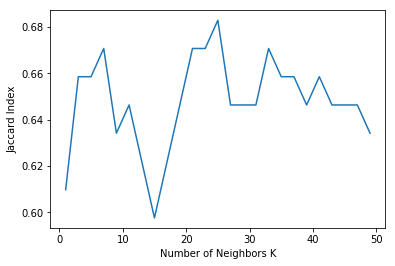

In [24]:
optimal_k_1 = neighbors[cv_scores_1.index(max(cv_scores_1))]
print('The optimal number of neighbors is %d' % optimal_k_1)

plt.plot(neighbors, cv_scores_1)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Jaccard Index')
plt.show()

In [25]:
cv_scores_2 = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores_2.append(scores.mean())

The optimal number of neighbors is 11


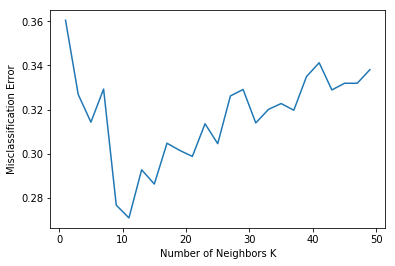

In [26]:
MSE = [1 - x for x in cv_scores_2]

optimal_k_2 = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d' % optimal_k_2)

plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## Results

The results are reasonable, K = 11 is a good number, not too high or too low for the hyperparameter. The Kfold helps a great deal on the randomness of the normal KNN, the Misscalassification error, MSE, is around 10%.

## Discussion and Conclusions

The biggest shortcoming of this project are pretty evident, unless a 400$ monthly subscription you have 500 premium calls per day to the Foursquare API, thus the dataset dimension is not impressive. Plus the definition of price range is pretty vague. Lastly Foursquare is not at all common in Italy.
A nice step to reduce drastically all this issues is to change the source of the data, from Foursquare to Trip Advisor. Unfortunately they only give an API key to torist companies and they don't like at all people using theyr data for research or data science projects.
Maybe I shuld learn a little bit more about that webscraping stuff...
Hope you liked my code and I hope to not have killed you with my ramblings...
Happy midterm night to you all!